In [44]:
import math
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib
import random as rand
from matplotlib import pyplot as plt
from itertools import product
import itertools
import time
import re
import csv
from hurst import compute_Hc
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox
import statsmodels.api as sm
import tqdm

%matplotlib inline

In [56]:
plt.rcParams["axes.labelsize"] = 16. 
plt.rcParams["xtick.labelsize"] = 14. 
plt.rcParams["ytick.labelsize"] = 14. 
plt.rcParams["legend.fontsize"] = 12. 
plt.rcParams["figure.figsize"] = [17., 8.]

In [63]:
data_default = pd.read_csv('../data/params_search/params_5.csv')
data_default.head(5)

,Id,price,volume,bid_price,ask_price,bid_volume,ask_volume,MM1,LC1,MT1,MRT1,NT1,DDPG1
0,0,100.82,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0
1,1,100.78,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0
2,2,100.74,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0
3,3,100.69,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0
4,4,100.65,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0


In [64]:
data_ddpg = pd.read_csv('../data/params_search/params_7_ddpg.csv')
data_ddpg.head(5)

,Id,price,volume,bid_price,ask_price,bid_volume,ask_volume,MM1,LC1,MT1,MRT1,NT1,DDPG1
0,0,100.82,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0
1,1,100.78,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100.74,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0
3,3,100.69,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0
4,4,100.65,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
data_def = data_default["price"]

In [59]:
data_default['returns'] = data_def.pct_change()

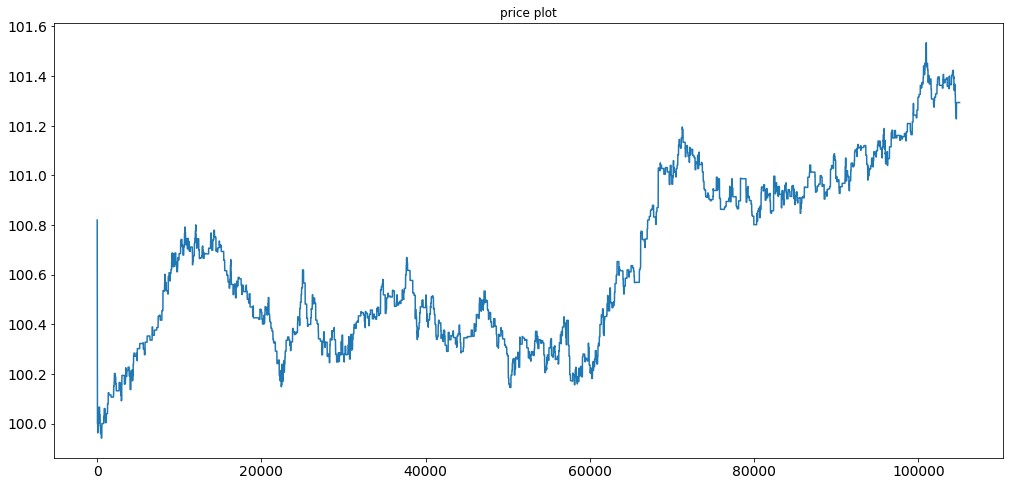

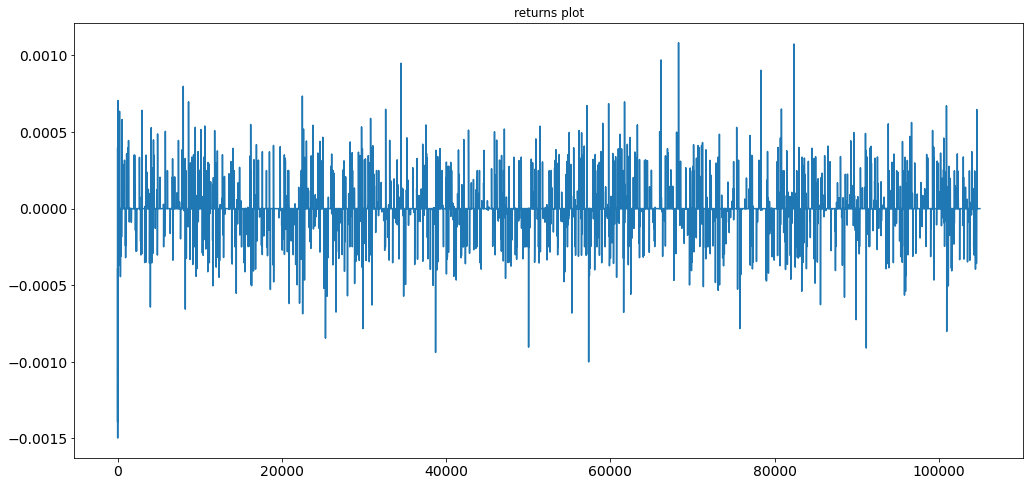

In [60]:
plt.plot(data_def)
plt.title('price plot')
plt.show()

plt.plot(data_default['returns'])
plt.title('returns plot')
plt.show()

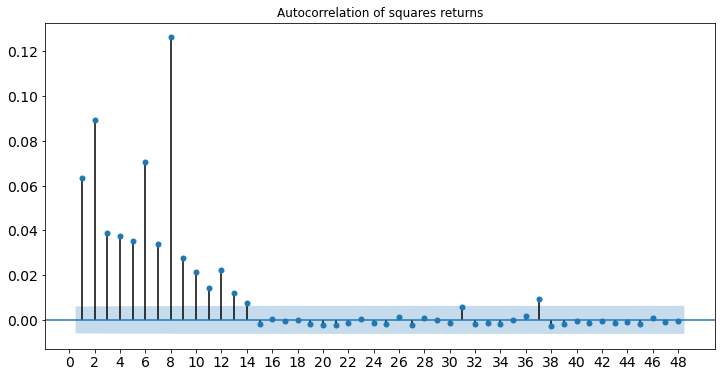

Dickey—Fuller_test_value: p=0.000000


In [61]:
plt.rcParams['figure.figsize'] = (12,6)
plot_acf(data_default['returns'].fillna(0)**2, lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('Autocorrelation of squares returns')
plt.show()
print('Dickey—Fuller_test_value: p=%f' % adfuller(data_default['returns'].fillna(0)**2)[1])